In [1]:
import h5py
import os
import numpy as np
from skimage.io import imsave
import matplotlib.pyplot as plt


In [4]:
dataFile = '/Volumes/genie/Jihong_GENIE_stuff/patch_attempt_0010_000/sIPSC&imaging_000/000/Camera/frames.ma'
imgData = h5py.File(dataFile,'r')
imgData = imgData['data'][()]

# imsave('/Users/zhengj10/Desktop/a/'+str(trial+1)+'.tif',imgData)

In [5]:
imgData.shape

(1500, 508, 508)

### Single cell

In [30]:
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2020.11.25_000/plate_011/patch_attempt_0041_000/camera_clamp1_000/'

In [31]:
imgData_all = []
for trial in range(9):
#     dataFile = imgPath+str(trial).zfill(3)+'/Camera/frames.ma'
    dataFile = imgPath+str(trial).zfill(3)+'/Camera/frames.ma'
    imgData = h5py.File(dataFile,'r')
    imgData = imgData['data'][()]
#     imgData_mean.append(imgData_all[:1000,:,:])
    imsave('/Users/zhengj10/Desktop/a/'+str(trial+1)+'.tif',imgData)

/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: /Users/zhengj10/Desktop/a/1.tif is a low contrast image
  
/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: /Users/zhengj10/Desktop/a/2.tif is a low contrast image
  
/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: /Users/zhengj10/Desktop/a/3.tif is a low contrast image
  
/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: /Users/zhengj10/Desktop/a/4.tif is a low contrast image
  
/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: /Users/zhengj10/Desktop/a/5.tif is a low contrast image
  
/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: /Users/zhengj10/Desktop/a/6.tif is a low contrast image
  
/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_la

In [9]:
# imgData_mean = np.mean(imgData_all,axis=0)

In [10]:
# imsave('/Users/zhengj10/Desktop/a/mean.tif',imgData_mean)

### Check imaging data

In [2]:
# imgPath = '/Users/zhengj10/Desktop/PatcherBot/processed/2020.02.03_000/'
# imgPath = '/Users/zhengj10/Desktop/2020.08.04_000/'
# imgPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2020.06.25_000/'
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2020.10.07_000/plate_000/patch_attempt_0000_000/camera_clamp1_000/000/Camera'
os.path.exists(imgPath)


True

In [4]:
def getSessionInfo(imgPath):
    filePath = [d for d in os.listdir(imgPath) if os.path.isdir(os.path.join(imgPath, d))]
    filePath = sorted(filePath)
    return filePath


In [5]:
platePath = getSessionInfo(imgPath)
platePath
# trialPath = getSessionInfo(cellPath)
# cellPath

['plate_000', 'plate_001']

In [6]:
cellPath = getSessionInfo(os.path.join(imgPath, platePath[0]))
cellPath = sorted(cellPath)
cellPath
                          

['patch_attempt_0000_000',
 'patch_attempt_0001_000',
 'patch_attempt_0002_000',
 'patch_attempt_0004_000',
 'patch_attempt_0005_000',
 'patch_attempt_0006_000',
 'patch_attempt_0007_000',
 'patch_attempt_0008_000',
 'patch_attempt_0009_000',
 'patch_attempt_0010_000',
 'patch_attempt_0011_000',
 'patch_attempt_0012_000']

In [6]:
# channelPath = '/camera_clamp2_000/'
# trialPath = getSessionInfo(imgPath + cellPath[0] + channelPath)
# trialPath


In [7]:
def get_dff(imgData):
    f0 = np.mean(imgData[100:200, int(imgData.shape[1]/2)-20:int(imgData.shape[1]/2)+20, :])
    print(f0)

    fb = np.mean(imgData[100:200,:20,:20])
    print(fb)
#         fb = np.min(imgData[frame,:,:])
    f = np.mean(imgData[900:1100, int(imgData.shape[1]/2)-20:int(imgData.shape[1]/2)+20, :])
    print(f)
    dff = (f-f0)/(f0-fb)
    return dff


In [8]:
# def get_dff(imgData):
#     dff_list = []
#     f0 = np.mean(imgData[100:200, int(imgData.shape[1]/2)-20:int(imgData.shape[1]/2)+20, :])
#     for frame in range(imgData.shape[0]):
#         fb = np.mean(imgData[frame,:20,:20])
# #         fb = np.min(imgData[frame,:,:])
#         f = np.mean(imgData[frame, int(imgData.shape[1]/2)-20:int(imgData.shape[1]/2)+20, :])
#         dff = (f-f0)/(f0-fb)
#         dff_list.append(dff)
#     return dff_list


In [9]:
# def get_dff(imgData, neg = True):
#     dff_list = []
#     f0 = np.mean(imgData[100:200, int(imgData.shape[1]/2)-20:int(imgData.shape[1]/2)+20, :])
#     for frame in range(imgData.shape[0]):
#         fb = np.mean(imgData[frame,:20,:20])
# #         fb = np.min(imgData[frame,:,:])
#         if neg:
#             f = np.max(imgData)
#         else:
#             f = np.min(imgData)
#         dff = (f-f0)/(f0-fb)
#         dff_list.append(dff)
#     return dff_list


In [13]:
dff_all = []
for plate in platePath:
    for cell in cellPath:
        if not os.path.exists(os.path.join(imgPath,plate,cell,'camera_clamp1_000')):
            continue
        dff_list = []
        print(cell)
        for trial in range(4):

            dataFile = imgPath +  '/' + plate + '/' + cell + '/camera_clamp1_000/' + str(trial).zfill(3) + '/Camera/frames.ma'

            data = h5py.File(dataFile,'r')
            imgData = data['data'][()]
            dff_single = get_dff(imgData)
            dff_list.append(dff_single)


patch_attempt_0026_000
1946.1861341463414
1756.2023
2006.858100609756
1917.961481707317
1752.378475
1930.2724542682927
1887.7616341463415
1748.966475
1879.1642865853657
1865.2713414634147
1747.29845
1851.0320975609757


In [14]:
imgData.shape

(3599, 508, 41)

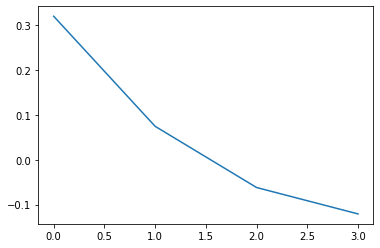

In [15]:
plt.plot(dff_list)
plt.show()

ValueError: The lengths of the data (1) and the error 4 do not match

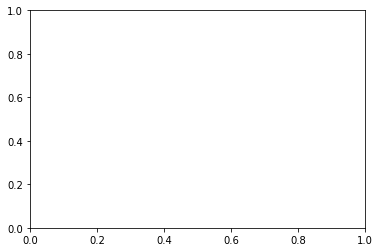

In [17]:
fig = plt.figure()
dff_all_mean = np.mean(dff_all, axis=0)
# dff_all_sem = np.std(dff_all, axis = 0)/(len(dff_all)-1)
# dff_all_sem = np.zeros(9)
# x = np.linspace(-100,40,9)

dff_all_sem = np.zeros(4)
x = np.linspace(-100,-40,4)


plt.errorbar(x, dff_all_mean, yerr=dff_all_sem, fmt='o-', markersize='8', lw=2)
# fig.savefig('/Users/zhengj10/Desktop/414.1.png')
plt.show()


In [18]:
# dff_all_sensor={}

In [ ]:
dff_all_sensor['414.1'] = dff_all_mean

In [ ]:
dff_all_sensor

In [ ]:
fig = plt.figure(figsize=[8,8])
# colormap = {'376.1':'#1f77b4', '376.13': '#ff7f0e', '414.1': '#2ca02c'}
for sensor in['376.1','376.13','414.1']:
    dff_all_mean = dff_all_sensor[sensor]
    dff_all_sem = np.std(dff_all, axis = 0)/(len(dff_all)-1)
    x = np.linspace(-100,40,9)
    plt.errorbar(x, dff_all_mean, yerr=dff_all_sem, fmt='o-', markersize='8', lw=2, label=sensor)
    plt.legend()
fig.savefig('/Users/zhengj10/Desktop/SfN/PatcherBot.pdf', dpi=1200)
plt.show()


In [ ]:
x = data['info']['0']['values']


### Check meta data

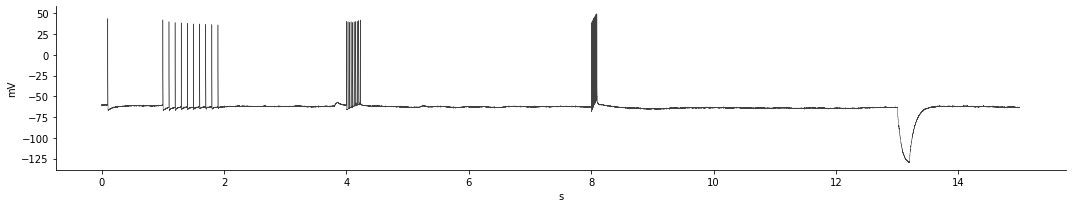

In [55]:
fig = plt.figure(figsize=[15,3])
# fig = plt.figure(figsize=[4,3])
dataFile = '/Volumes/Backup Plus/PatcherBot/raw/2021.05.19_000/plate_000/patch_attempt_0006_000/I_clamp1_000/000/Clamp1.ma'
data = h5py.File(dataFile,'r')
meta = data['data'][()]
trace = meta[1,:]*1000
x = np.arange(trace.shape[0])/40000
ax = plt.subplot(111)
# ax.plot(trace[3000:44000])
# ax.plot(trace[39000:80000])
# ax.plot(trace[159000:200000])
# ax.plot(x[319000:327000],trace[319000:327000],color='k',alpha=0.75,lw=0.5)
ax.plot(x,trace,color='k',alpha=0.75,lw=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('s')
ax.set_ylabel('mV')
plt.tight_layout()
fig.savefig('/Users/zhengj10/Desktop/210526/Voltron 2-ST & JF549/JF549_1uM_APs.png',dpi=1200)
plt.show()


In [45]:
# imgPath = '/Volumes/Backup Plus/PatcherBot/raw/2021.05.21_000/plate_001/'

# for trial in range(28,45):

#     dataFile = os.path.join(imgPath,'patch_attempt_00'+str(trial).zfill(2)+'_000','I_clamp1_000/000/Camera/frames.ma')
#     if not os.path.exists(dataFile):
#         continue
#     if trial in [28,31,36]:
#         continue
#     imgData = h5py.File(dataFile,'r')
#     imgData = imgData['data'][()]
#     imsave('/Users/zhengj10/Desktop/210526/Positron 2-ST & JF549/BAPTA_JF549_1uM_15min_'+str(trial)+'.tif',imgData)
#     print(imgData.shape)


imgPath = '/Volumes/Backup Plus/PatcherBot/raw/2021.05.19_000/plate_000'
dataFile = os.path.join(imgPath,'patch_attempt_0006_000','I_clamp1_000/000/Camera/frames.ma')

imgData = h5py.File(dataFile,'r')
imgData = imgData['data'][()]
imsave('/Users/zhengj10/Desktop/210526/Voltron 2-ST & JF549/JF549_200nM.tif',imgData)
print(imgData.shape)


/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: /Users/zhengj10/Desktop/210526/Voltron 2-ST & JF549/JF549_200nM.tif is a low contrast image


(14811, 508, 41)


In [46]:
imgData_mean = np.mean(imgData,axis=0)

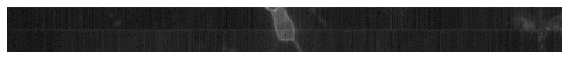

In [48]:
plt.figure(figsize=[8,1])
plt.imshow(np.transpose(imgData_mean),cmap='gray',vmax=1800)
plt.axis('off')
plt.tight_layout()
plt.savefig('/Users/zhengj10/Desktop/210526/Voltron 2-ST & JF549/JF549_200nM_dFF_1kHz.png')
plt.show()


In [52]:
import pandas as pd
df = pd.read_csv('/Users/zhengj10/Desktop/210526/Voltron 2-ST & JF549/F_JF549.csv')

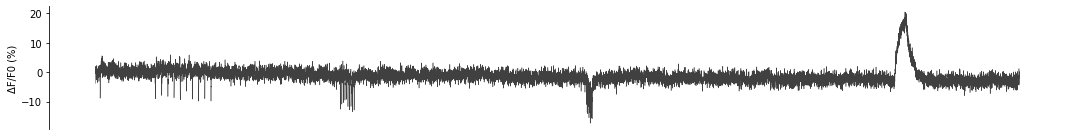

In [54]:
fig = plt.figure(figsize=[15,2])
# fig = plt.figure(figsize=[4,1.8])
ax = plt.subplot(111)
F = df.Mean.to_list()
x = np.arange(len(F))*15/len(F)
F0 = np.mean(F[:10])
Fb = np.min(imgData_mean)
dFF = 100*(np.array(df.Mean.to_list())-F0)/(F0-Fb)
ax.plot(x,dFF,color='k',alpha=0.75,lw=0.5)
# ax.plot(x[900:2000],dFF[900:2000],color='k',alpha=0.75,lw=0.5)
# ax.plot(x[3900:4280],dFF[3900:4280],color='k',alpha=0.75,lw=0.5)
# ax.plot(x[7845:8040],dFF[7845:8040],color='k',alpha=0.75,lw=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.set_xlabel('s')
ax.set_ylabel('\u0394F/F0 (%)')
ax.axes.get_xaxis().set_visible(False)
plt.tight_layout()
fig.savefig('/Users/zhengj10/Desktop/210526/Voltron 2-ST & JF549/JF549_200nMdFF.png',dpi=1200)
plt.show()


In [51]:
dataPath = '/Volumes/Backup Plus/PatcherBot/raw/2020.09.23_000/plate_004/patch_attempt_0030_000/I_clamp1_000/'

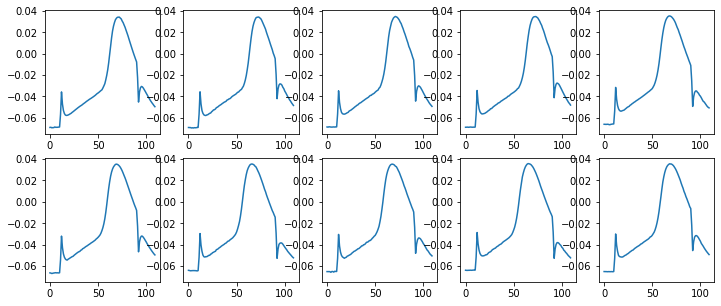

In [61]:
fig = plt.figure(figsize=[12,5])
ylim_min = []
ylim_max = []
for trial in range(10):
    dataFile = dataPath + str(trial).zfill(3) + '/Clamp1.ma'

    data = h5py.File(dataFile,'r')
    meta = data['data'][()]
    trace = meta[1,:]
    ax = plt.subplot(2,5,trial+1)
    ax.plot(trace[7990:8100])
    ylim_min.append(ax.get_ylim()[0])
    ylim_max.append(ax.get_ylim()[1])
    ax.set_ylim([-0.07480988389814429,0.040812890150413506])
ax.set_ylim([np.min(ylim_min),np.max(ylim_max)])
plt.show()


In [59]:
def get_Rs(logFile):
    important = []
    keep_phrases = ["whole cell"]
    with open(logFile) as f:
        f = f.readlines()
    for line in f:
        for phrase in keep_phrases:
            if phrase in line:
                important.append(line)
                break
    seal_start = eval(important[0])
    seal_end = eval(important[1])
    seal_time = seal_end['event_time'] - seal_start['event_time'] - 5 # 5 sec sleep while pressure at -1kpa
    return(seal_time)

0.040812890150413506

In [22]:
dataPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/opt_stim/patch_attempt_0004_000/opto_stim_000/'

In [11]:
# os.path.exists(dataPath)

In [32]:
trace_all = []
for trial in range(10):
    dataFile = dataPath + str(trial).zfill(3) + '/Clamp1.ma'
    data = h5py.File(dataFile,'r')
    meta = data['data'][()]
    trace = meta[1,:]
    trace_all.append(trace)


In [33]:
trace_mean = np.mean(trace_all, axis=0)

(-1.777267103567586e-11, 3.444598022660853e-11)

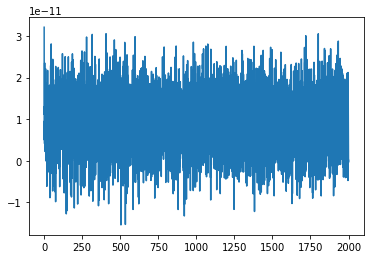

In [45]:
ax = plt.subplot(111)
x = np.linspace(0,2000,80000)

ax.plot(x,trace_mean)

ax.set_ylim([480,700])
ax.get_ylim()

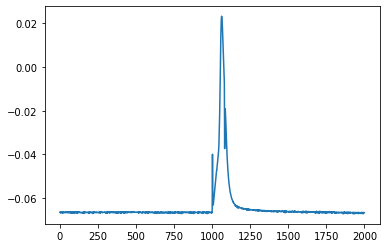

In [13]:
meta.shape

(3, 80000)

In [42]:
a

{'a': 1}

In [29]:
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
from WC_ephys_Voltron import get_data, mem_test, get_rmp, get_threshold, get_AP_params, low_pass

(-1.6116606826553046e-10, 1.3229563649641253e-10)

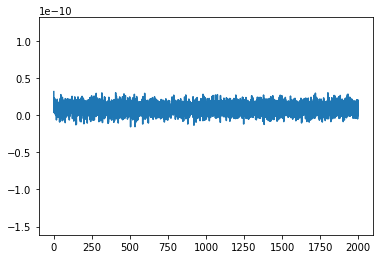

In [39]:
trace_mean=low_pass(trace_mean)

ax = plt.subplot(111)
x = np.linspace(0,2000,80000)

ax.plot(x,trace_mean)

# ax.xlim([480,700])
ax.set_ylim([-1.6116606826553046e-10, 1.3229563649641253e-10])

In [55]:
data = h5py.File(dataFile,'r')
meta = data['data'][()]




In [56]:
meta.shape


(3, 80000)

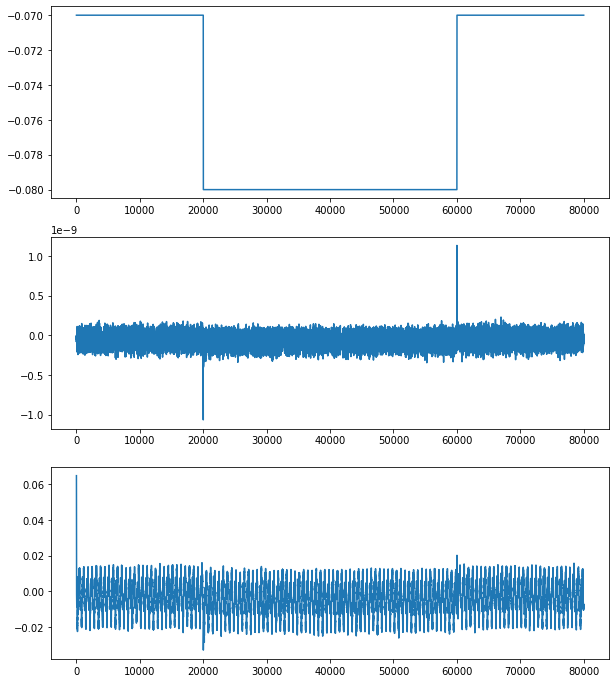

In [57]:
fig = plt.figure(figsize=[10,12])
for ch in range(meta.shape[0]):
    ax = fig.add_subplot(3,1,ch+1)
    ax.plot(meta[ch,:])
#     ax.set_xlim([550,700])

plt.show()
# fig.savefig('/Users/zhengj10/Desktop/Clamp2.ma.data.2.png')


In [27]:
data.keys()

KeysView(<HDF5 file "Clamp1.ma" (mode r+)>)

In [ ]:
plt.plot(imgData[2,:])
plt.show()


In [49]:
# sin wave
t = np.linspace(0,2,1000)
sig = np.sin(1.2*2*np.pi*t)# Lets add some noise
noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = sig + noise

### Get tiff sequences for specified voltage step

In [19]:
# dataFile = '/Users/zhengj10/Desktop/0925_376.1/patch_attempt_0000_000/camera_clamp2_000/008/Camera/frames.ma'
dataFile = '/Volumes/Backup Plus/2020.10.14_000/plate_000/patch_attempt_0000_000/camera_clamp1_for_kinetics_000/000/Camera/frames.ma'
# dataFile = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/patch_attempt_0035_000/camera_clamp2_000/008/Camera/frames.ma'


In [20]:
import h5py
data = h5py.File(dataFile)
imgData = data['data'][()]

In [21]:
x = data['info']['0']['values'][()] # Frame time stamp
x

array([0.        , 0.00398207, 0.0079639 , ..., 2.0079515 , 2.00827289,
       2.00859451])

In [7]:
a = []
for i in range(x.shape[0]-1):
    a.append(x[i+1]-x[i])
    

In [8]:
import matplotlib.pyplot as plt

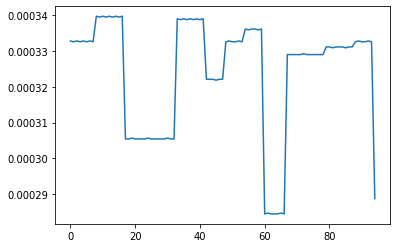

In [18]:
plt.plot(a[5:100])

In [ ]:
dff_list = get_dff(imgData)

In [ ]:
plt.plot(x,dff_list, lw=0.3)
plt.show()


In [ ]:
# imsave('/Users/zhengj10/Desktop/test.tif', imgData)

In [ ]:
imgData.shape

### Save as one tif file (large size)

In [21]:
entire_seq = np.zeros([2,508,41])
# imgPath = '/Users/zhengj10/Desktop/Data anlysis collection/PatcherBot/raw/2020.02.24_000/plate_000/patch_attempt_0013_000'
for trial in range(4):
#     dataFile = os.path.join(imgPath,'camera_clamp1_000',str(trial).zfill(3),'Camera','frames.ma')
    dataFile = os.path.join(imgPath,'plate_000/patch_attempt_0026_000/camera_clamp1_000',str(trial).zfill(3),'Camera','frames.ma')

#     dataFile = imgPath +  '/' + plate + '/' + cell + '/camera_clamp1_000/' + str(trial).zfill(3) + '/Camera/frames.ma'
#     dataFile = imgPath +  '/' + platePath[0] + '/' + cellPath[7] + '/camera_clamp2_000/' + str(trial).zfill(3) + '/Camera/frames.ma'
    data = h5py.File(dataFile,'r')
    imgData = data['data'][()]
    print(imgData.shape)
    entire_seq = np.concatenate((entire_seq, imgData), axis=0)

entire_seq = entire_seq[2:,:,:]
entire_seq.shape


(3564, 508, 41)
(2733, 508, 41)
(4137, 508, 41)
(3599, 508, 41)


(14033, 508, 41)

In [46]:
def roll_ave(imgFile):
    frames = []
    for frame in range(imgFile.shape[0]):

        if frame%10 == 0:
            ave_frame = np.mean(imgFile[frame:frame+4,:,:],axis=0)
            frames.append(ave_frame)
    frames = np.array(frames, dtype='float32')
    return frames
            
        

In [47]:
newImg = roll_ave(entire_seq)

In [48]:
newImg.shape

(1795, 508, 41)

In [22]:
imsave('/Users/zhengj10/Desktop/40x_oil.tif', entire_seq.astype('float32'))

In [50]:
imsave('/Users/zhengj10/Desktop/roll_ave_421.1.tif', newImg.astype('float32'))

In [ ]:
mean_img = np.mean(entire_seq, axis=0)
mean_img.shape
np.max(mean_img)-np.min(mean_img)


In [ ]:
plt.figure(figsize=[16,10])
plt.imshow(mean_img, cmap='gray', vmax=1800)
plt.colorbar()
plt.show()


### Check meta in .index file

In [ ]:
import yaml

In [ ]:
a = yaml.load(open("/Users/zhengj10/Desktop/index"), Loader=yaml.FullLoader)
a


In [ ]:
def get_data(matFile):
    data = {}
    f = h5py.File(matFile)
#     d = f['params']['fit_pix_double'] # for double fit
#     amp_on_fast = []
#     amp_on_slow = []
#     amp_off_fast = []
#     amp_off_slow = []
#     tau_on_fast = []
#     tau_on_slow = []
#     tau_off_fast = []
#     tau_off_slow = []
#     time_on_fast = []
#     time_on_slow = []
#     time_off_fast = []
#     time_off_slow = []
    
    
#     def isNaN(num):
#         return num != num
#     for vStep in range(len(d)):
#         st = d[vStep]
#         obj = f[st]
#         if vStep == 0:
#             data['dff_corrected'] = obj['bleach_bkg_norm_ave_trace'][()]
#             if isNaN(data['dff_corrected'][0]):
#                 print ('No responsive pixels')
#         amp_on_fast.append(obj['bkg_norm_ave_onamp0'][()][0])
#         amp_on_slow.append(obj['bkg_norm_ave_onamp1'][()][0])
#         amp_off_fast.append(obj['bkg_norm_ave_offamp0'][()][0])
#         amp_off_slow.append(obj['bkg_norm_ave_offamp1'][()][0])
#         tau_on_fast.append(obj['bkg_norm_ave_ontime0'][()][0])
#         tau_on_slow.append(obj['bkg_norm_ave_ontime1'][()][0])
#         tau_off_fast.append(obj['bkg_norm_ave_offtime0'][()][0])
#         tau_off_slow.append(obj['bkg_norm_ave_offtime1'][()][0])
#     data['amp_on_fast'] = amp_on_fast
#     data['amp_on_slow'] = amp_on_slow
#     data['amp_off_fast'] = amp_off_fast
#     data['amp_off_slow'] = amp_off_slow
#     data['tau_on_fast'] = tau_on_fast
#     data['tau_on_slow'] = tau_on_slow
#     data['tau_off_fast'] = tau_off_fast
#     data['tau_off_slow'] = tau_off_slow
    
    
    d_single = f['params']['fit_pix_single']  # for single fit
    amp_on = []
    amp_off = []
    tau_on = []
    tau_off = []
    time_on = []
    time_off = []
#     tau_on_sigma = []
#     tau_off_sigma = []
    stim_frame_num = []
    for vStep in range(len(d_single)):
        st = d_single[vStep]
        obj = f[st]
        if vStep == 0:
            data['dff_corrected'] = obj['bleach_bkg_norm_ave_trace'][()]
            data['bleach'] = obj['bkg_norm_ave_bleach_parameters'][()][1]
            data['bleach_x'] = obj['bkg_norm_ave_bleach_parameters'][()][0]
        amp_on.append(obj['bkg_norm_ave_onamp'][()][0])
        amp_off.append(obj['bkg_norm_ave_offamp'][()][0])
        tau_on.append(obj['bkg_norm_ave_ontau'][()][0])
        tau_off.append(obj['bkg_norm_ave_offtau'][()][0])
        time_on.append(obj['bkg_norm_ave_ontime'][()][0])
        time_off.append(obj['bkg_norm_ave_offtime'][()][0])
#         tau_on_sigma.append(obj['bkg_norm_ave_ontime_sigma'][()][0])
#         tau_off_sigma.append(obj['bkg_norm_ave_offtime_sigma'][()][0])
#         stim_frame_num.append(obj['stim_frame_num'][()])
    data['amp_on'] = amp_on
    data['amp_off'] = amp_off
    data['tau_on'] = tau_on
    data['tau_off'] = tau_off
    data['time_on'] = time_on
    data['time_off'] = time_off
#     data['tau_on_sigma'] = tau_on_sigma
#     data['tau_off_sigma'] = tau_off_sigma
#     data['stim_frame_num'] = stim_frame_num
    return data


In [ ]:
matFile = imgPath + cellPath[0] + '/000.mat'

In [ ]:
data = get_data(matFile)

trace = data['dff_corrected']

In [ ]:
plt.plot(trace)
plt.show()


In [ ]:
imgPath = '/Volumes/genie/BenArthur/patch-screen-10to90/bot/2019.10.04_000/patch_attempt_0009_000/'

In [ ]:
def get_dff(trace):
    dff_single = np.mean(trace[500:1400]) - np.mean(trace[:400])
    return dff_single


In [ ]:
dff = []
for i in range(9):
    matFile = imgPath + str(i).zfill(3) + '.mat'
    print(matFile)
    data = get_data(matFile)
    trace = data['dff_corrected']
    dff_single = get_dff(trace)
    dff.append(dff_single)


In [ ]:
dff

In [ ]:
x = np.linspace(-100,40,9)
plt.plot(x, dff)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({'a':1, 'b':'mountain', 'c': [[1,2,3],[4,5,6]]})
# df = pd.DataFrame({'a':[1,2,3]})

In [ ]:
a = np.mean(df.c.tolist(), axis=0)

In [ ]:
df.c

In [ ]:
df.c.tolist()